## Implementing the aggregated features from the paper "Feature engineering strategies for creditcard fraud detection"

There two kinds of features authors propose in this [paper](https://www.sciencedirect.com/science/article/abs/pii/S0957417415008386) for credit card fraud detection
* Features capturing customer spending patterns (see `Aggregated_Features.ipynb`)
* Time features (implemented in this notebook)

In [ ]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame(data={"Id": [1, 2, 3, 4, 5, 6, 7],
                        "Time": ["01/01/15 18:20", "01/01/15 20:35", "01/01/15 22:30",
                                 "02/01/15 00:50", "02/01/15 19:18", "02/01/15 23:45",
                                 "03/01/15 00:00"]})

# Convert the "Time" column to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%y %H:%M')

# Calculate the time in seconds since the first timestamp
df['Time_seconds'] = df['Time'].dt.hour*3600+df['Time'].dt.minute*60

# Calculate the rolling mean from the 3rd row onwards in seconds
rolling_mean_seconds = df['Time_seconds'].rolling(window=86400, min_periods=2, closed='left').mean()

# Convert the rolling mean from seconds to hour:minute format
df['Arithmetic_mean'] = pd.to_timedelta(rolling_mean_seconds, unit='s')

# Print the result
df

,Id,Time,Time_seconds,Arithmetic_mean
0,1,2015-01-01 18:20:00,66000,NaT
1,2,2015-01-01 20:35:00,74100,NaT
2,3,2015-01-01 22:30:00,81000,0 days 19:27:30
3,4,2015-01-02 00:50:00,3000,0 days 20:28:20
4,5,2015-01-02 19:18:00,69480,0 days 15:33:45
5,6,2015-01-02 23:45:00,85500,0 days 16:18:36
6,7,2015-01-03 00:00:00,0,0 days 17:33:00


The above values match to the paper except for the row index 5 and 7 where they are less by exactly one hour. Let us use the `pycircular` package and calculate the mean

In [ ]:
!pip install pycircular

In [ ]:
import pandas as pd

In [ ]:
data = {"Id":[1,2,3,4,5,6,7],
        "Time":["01/01/15 18:20","01/01/15 20:35","01/01/15 22:30",
                "02/01/15 00:50","02/01/15 19:18","02/01/15 23:45",
                "03/01/15 06:00"],
       }

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Id,Time
0,1,01/01/15 18:20
1,2,01/01/15 20:35
2,3,01/01/15 22:30
3,4,02/01/15 00:50
4,5,02/01/15 19:18
5,6,02/01/15 23:45
6,7,03/01/15 06:00


In [ ]:
df['Time'] = pd.to_datetime(df['Time'],  infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      7 non-null      int64         
 1   Time    7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 240.0 bytes


In [ ]:
df

,Id,Time
0,1,2015-01-01 18:20:00
1,2,2015-01-01 20:35:00
2,3,2015-01-01 22:30:00
3,4,2015-02-01 00:50:00
4,5,2015-02-01 19:18:00
5,6,2015-02-01 23:45:00
6,7,2015-03-01 06:00:00


In [ ]:
dates = df.loc[:,"Time"]
dates

0   2015-01-01 18:20:00
1   2015-01-01 20:35:00
2   2015-01-01 22:30:00
3   2015-02-01 00:50:00
4   2015-02-01 19:18:00
5   2015-02-01 23:45:00
6   2015-03-01 06:00:00
Name: Time, dtype: datetime64[ns]

In [ ]:
import pycircular

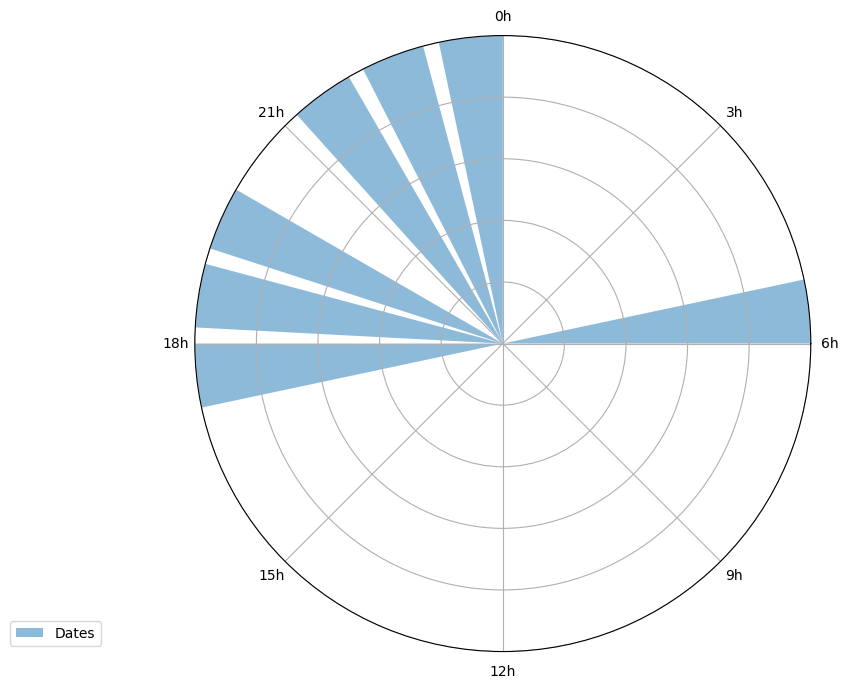

In [ ]:
time_segment = "hour" #"dayweek", "daymonth"
freq_arr, times = pycircular.utils.freq_time(dates, time_segment=time_segment)
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

In [ ]:
times

Float64Index([18.333333333333332, 20.583333333333332,               22.5,
              0.8333333333333334,               19.3,              23.75,
                             6.0],
             dtype='float64', name='Time')

In [ ]:
dates_mean = times.values.mean()
dates_mean

15.9

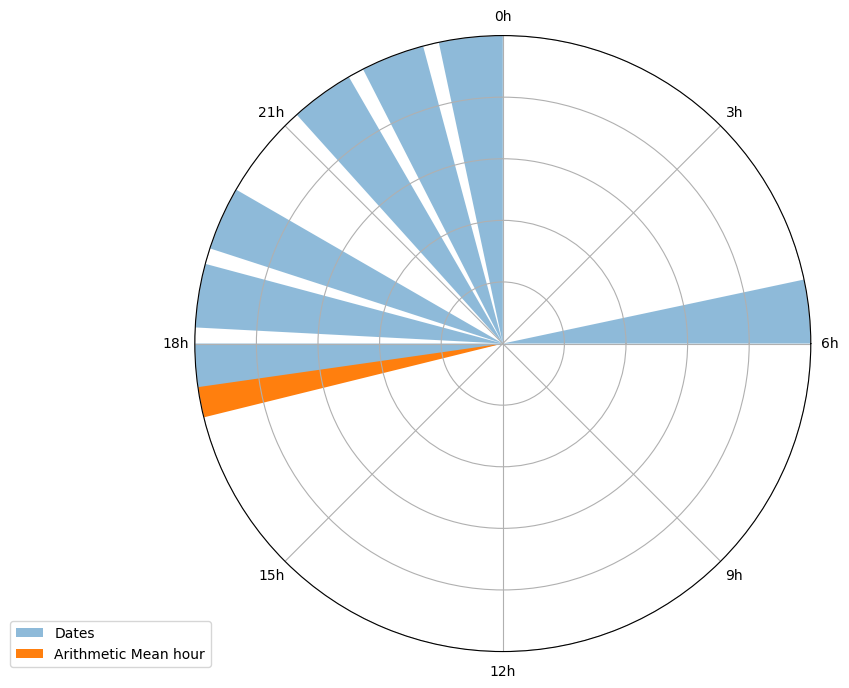

In [ ]:
dates_mean = times.values.mean()
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1.bar([dates_mean], [1], width=0.1, label="Arithmetic Mean hour")
ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

In [ ]:
radians = pycircular.utils._date2rad(dates, time_segment="hour")
mean, std = pycircular.stats.periodic_mean_std(radians)

In [ ]:
df['radians'] = radians
df

,Id,Time,radians
0,1,2015-01-01 18:20:00,3.054326
1,2,2015-01-01 20:35:00,2.465278
2,3,2015-01-01 22:30:00,1.963495
3,4,2015-02-01 00:50:00,1.352630
4,5,2015-02-01 19:18:00,2.801253
5,6,2015-02-01 23:45:00,1.636246
6,7,2015-03-01 06:00:00,0.000000


In [ ]:
df

,Id,Time,radians
0,1,2015-01-01 18:20:00,3.054326
1,2,2015-01-01 20:35:00,2.465278
2,3,2015-01-01 22:30:00,1.963495
3,4,2015-02-01 00:50:00,1.352630
4,5,2015-02-01 19:18:00,2.801253
5,6,2015-02-01 23:45:00,1.636246
6,7,2015-03-01 06:00:00,0.000000


In [ ]:
train_start_index = 0
train_end_index = 1
df_train = df.iloc[train_start_index:train_end_index+1,:2]
df_train

,Id,Time
0,1,2015-01-01 18:20:00
1,2,2015-01-01 20:35:00


In [ ]:
def get_probability(df_train, time_column, df_test):
  """
  Predicts the probability for the new test sample's time is within the
  confidence interval of training time samples.
  """
  # get the dates column
  dates = df_train.loc[:,time_column]
  # Currently we define time segment inside function but in refactoring it
  # should be declared as a function argument
  time_segment = "hour" #"dayweek", "daymonth"
  freq_arr, times = pycircular.utils.freq_time(dates, time_segment=time_segment)
  # plot the periodic plot
  fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
  ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

  # calculate the arithmetic mean for the training samples.
  dates_mean = times.values.mean()
  print(f"Arithmetic mean = {dates_mean}")
  ax1.bar([dates_mean], [1], width=0.1, label="Arithmetic Mean hour")
  ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

  # von Mises modeling
  radians = pycircular.utils._date2rad(dates, time_segment="hour")
  mean, std = pycircular.stats.periodic_mean_std(radians)
  print(f"Periodic mean = {mean}")

  ax1.bar([mean], [1], width=0.1, label="Periodic Mean hour")
  ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

  y = pycircular.circular.kernel(radians.values)
  ax1 = pycircular.plots.plot_kernel(freq_arr[:,0], freq_arr[:,1], y, time_segment=time_segment)

  radians = pycircular.utils._date2rad(pd.to_datetime(df_test[time_column]), time_segment="hour")
  df_test['prob'] = pycircular.circular.predict_proba(radians, y)
  return df_test


Arithmetic mean = 19.458333333333332
Periodic mean = 2.7598018797160333


<ipython-input-19-8f1d2fa86f69>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob'] = pycircular.circular.predict_proba(radians, y)


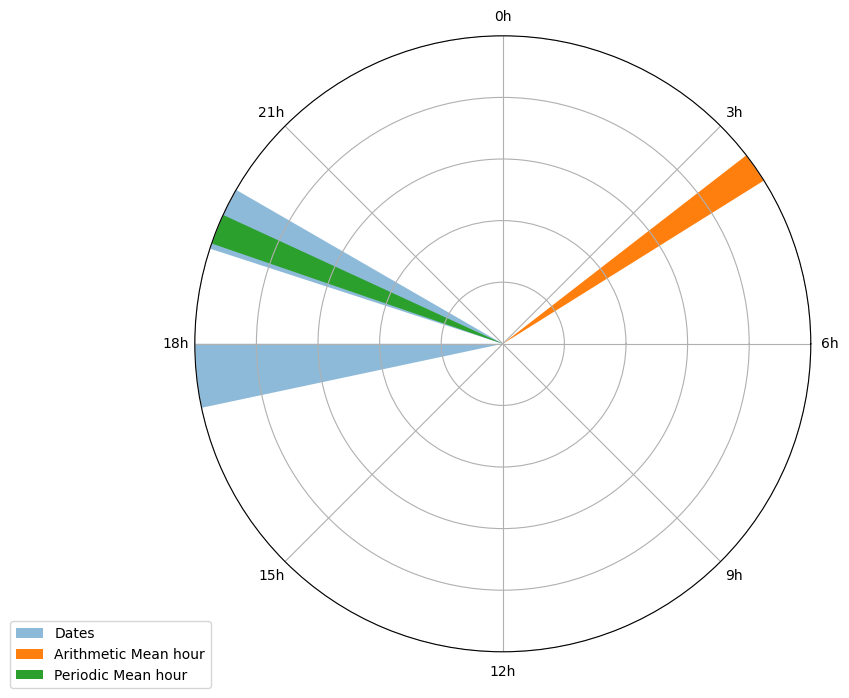

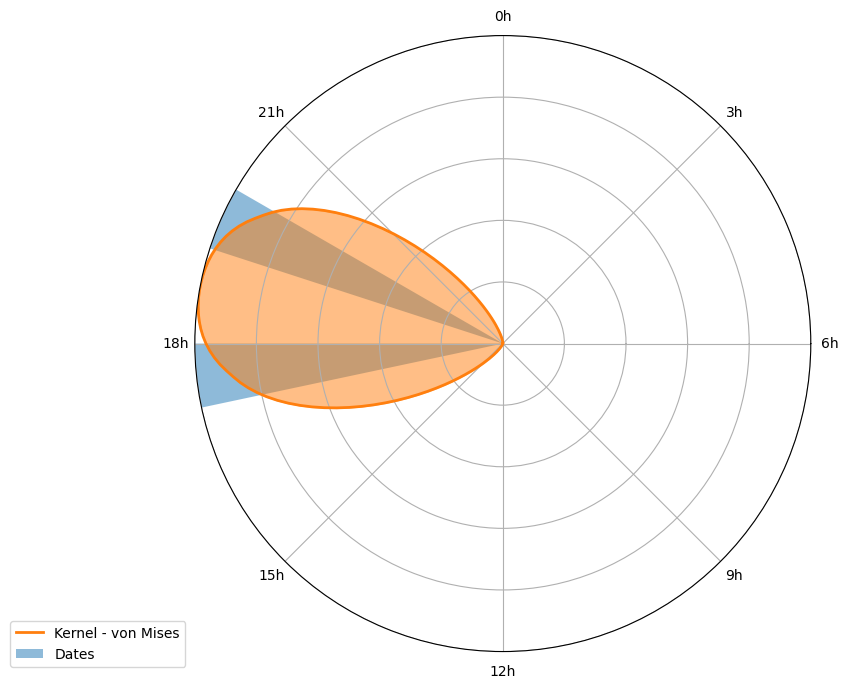

In [ ]:
df_test =  df.loc[2:]
df_final = get_probability(df_train, "Time", df_test)

In [ ]:
df_final

,Id,Time,radians,prob
2,3,2015-01-01 22:30:00,1.963495,2.585612e-01
3,4,2015-02-01 00:50:00,1.352630,3.645055e-03
4,5,2015-02-01 19:18:00,2.801253,9.966698e-01
5,6,2015-02-01 23:45:00,1.636246,3.282873e-02
6,7,2015-03-01 06:00:00,0.000000,1.799657e-08
